In [29]:
import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import download tools
import gdown

# File ID from the Google Drive shareable link
file_id = '1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP'
# URL to be used with gdown
gdown_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(gdown_url, 'data.csv', quiet=False)

# Read the CSV file into a DataFrame
data = pd.read_csv('data.csv', encoding='utf-8')
data.head()

Downloading...
From (original): https://drive.google.com/uc?id=1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP
From (redirected): https://drive.google.com/uc?id=1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP&confirm=t&uuid=ae9b82d7-98ae-47bd-9c07-61b3b638476d
To: /content/data.csv
100%|██████████| 266M/266M [00:03<00:00, 72.3MB/s]


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
# Display dataset structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [7]:
# Get unique values
unique_values = data['primaryCategories'].unique()

print(unique_values)

['Health & Beauty' 'Electronics' 'Office Supplies'
 'Animals & Pet Supplies' 'Home & Garden' 'Electronics,Furniture'
 'Toys & Games,Electronics' 'Electronics,Media'
 'Office Supplies,Electronics']


In [8]:
# Create new dataset out of selected columns
data = data[["dateAdded", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating"]]

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [9]:
# Concatenate
data['reviews.text'] = data['reviews.text'] + ' ' + data['reviews.title']

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


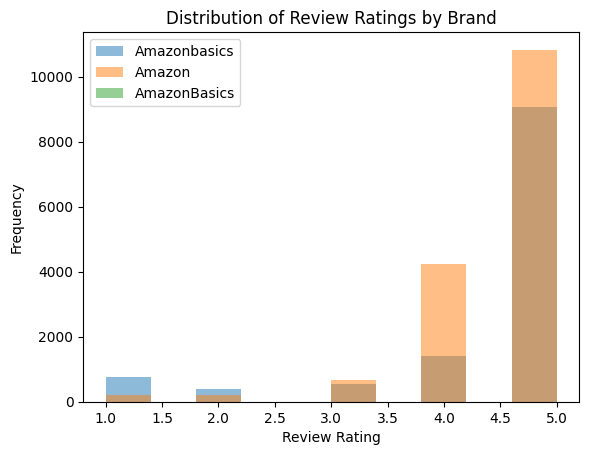

In [11]:
# Title Distribution of Review Ratings by Brand

import matplotlib.pyplot as plt

for brand in data['brand'].unique():
    plt.hist(data[data['brand'] == brand]['reviews.rating'], label=brand, alpha=0.5)

plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings by Brand')
_ = plt.legend()

In [12]:
# Set variable
data = pd.DataFrame(data)

# Convert the 'dateAdded' column to datetime format
data['dateAdded'] = pd.to_datetime(data['dateAdded'])

# Extract the year and create a new column 'year'
data['year'] = data['dateAdded'].dt.year

# Drop column
data.drop(['dateAdded'], axis=1, inplace=True)

# Display the resulting DataFrame
data.head()

KeyError: 'dateAdded'

In [13]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

primaryCategories    0
reviews.username     5
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


In [14]:
# Remove rows where 'reviews.username' is empty
data = data.dropna(subset=['reviews.username'])

# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

print (missing_values)
data.head()

primaryCategories    0
reviews.username     0
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [15]:
# Get the value counts for the 'reviews.rating' column
rating_counts = data['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5    19893
4     5648
3     1206
1      965
2      615
Name: count, dtype: int64


In [16]:
# Function to determine negative, neutral and positive
def review_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating in [3]:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"
    else:
        return None

In [17]:
# Apply the reviews rating
data['sentiment'] = data['reviews.rating'].apply(review_sentiment)
data.head()

<ipython-input-17-3a37e46844f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['reviews.rating'].apply(review_sentiment)


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015,positive


In [18]:
# We can now drop the reviews rating column, since we are just going to use sentiment.
data.drop(['reviews.rating'], axis=1, inplace=True)
data.head()

<ipython-input-18-e927a7412d87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['reviews.rating'], axis=1, inplace=True)


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,year,sentiment
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,2015,neutral
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,2015,positive
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,2015,positive
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,2015,positive
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,2015,positive


In [19]:
# Define a function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'[\u00BA\u00C4\u00C5\u00D4\u00E3\u00E8\u00EC\u00F2\u00F4\u00F9\u00FA\u0192]+', '', text)  # Remove specified characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove unnecessary whitespace
    text = re.sub(r'[^\x00-\x7F]+', '', text) # Example: Remove non-ASCII characters
    return text

In [20]:
# Apply text cleaning
data['reviews.text'] = data['reviews.text'].apply(clean_text)

# Display the resulting DataFrame
print(data.head())

  primaryCategories  reviews.username         brand  \
0   Health & Beauty        Byger yang  Amazonbasics   
1   Health & Beauty              ByMG  Amazonbasics   
2   Health & Beauty  BySharon Lambert  Amazonbasics   
3   Health & Beauty     Bymark sexson  Amazonbasics   
4   Health & Beauty           Bylinda  Amazonbasics   

                                        reviews.text  \
0  i order 3 of them and one of the item is bad q...   
1  bulk is always the less expensive way to go fo...   
2  well they are not duracell but for the price i...   
3  seem to work as well as name brand batteries a...   
4  these batteries are very long lasting the pric...   

                                       reviews.title  year sentiment  
0  ... 3 of them and one of the item is bad quali...  2015   neutral  
1  ... always the less expensive way to go for pr...  2015  positive  
2  ... are not Duracell but for the price i am ha...  2015  positive  
3  ... as well as name brand batteries at a much

<ipython-input-20-ce1f39548a77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(clean_text)


In [21]:
# Concatenate all strings in the column into a single string
all_text = ''.join(data['reviews.text'])

# Get unique characters using set
unique_chars = set(all_text)

# Optionally, sort unique characters
sorted_unique_chars = sorted(unique_chars)

# Print or use sorted_unique_chars as needed
print(sorted_unique_chars)

[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [23]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()

In [24]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()

# Define the function
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization
data['reviews.text'] = data['reviews.text'].apply(tokenize_and_lemmatize)

<ipython-input-24-1faffd60747c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(tokenize_and_lemmatize)


In [25]:
# Define features and target variable
X = data['reviews.text']
y = data['sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Test Accuracy: 0.9583480409459937
Test Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.58      0.72       316
     neutral       0.99      0.59      0.74       241
    positive       0.96      1.00      0.98      5109

    accuracy                           0.96      5666
   macro avg       0.97      0.72      0.81      5666
weighted avg       0.96      0.96      0.95      5666



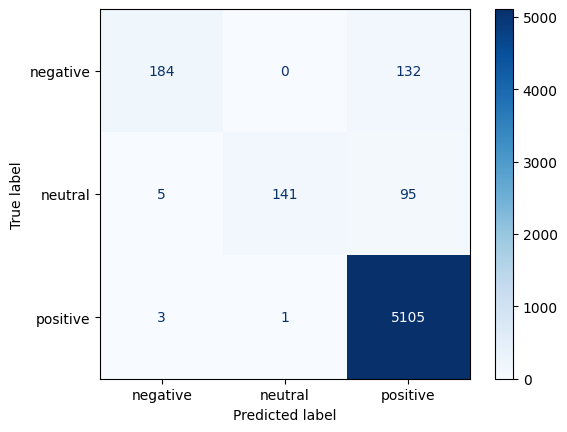

In [31]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Random Forest model on TF-IDF features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_test_pred = model.predict(X_test_tfidf)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
# Define a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define a parameter grid for grid search
param_grid = {
    'tfidf__max_features': [2000, 5000, 10000],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

In [27]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found during grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200, 'tfidf__max_features': 2000}
Best Cross-validation Accuracy: 0.9295705281013668


Test Accuracy: 0.9316978468055065
Precision: 0.9354440814565818
Recall: 0.9316978468055065
F1-score: 0.9146812745366794
Test Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.34      0.50       316
     neutral       1.00      0.26      0.41       241
    positive       0.93      1.00      0.96      5109

    accuracy                           0.93      5666
   macro avg       0.97      0.53      0.63      5666
weighted avg       0.94      0.93      0.91      5666



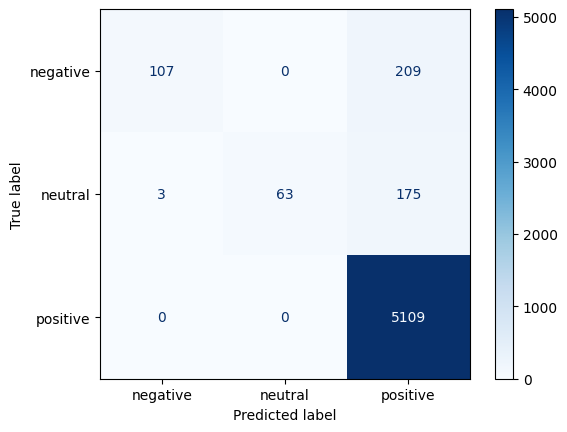

['/content/drive/MyDrive/random_forest_model.pkl']

In [30]:
# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation results
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Test Classification Report:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=['negative', 'neutral', 'positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Save the best model
joblib.dump(best_model, '/content/drive/MyDrive/random_forest_model.pkl')